In [1]:
import os
HOME = os.getcwd()
print(HOME)

/home/aseikin@pak-cspmz.ru/Dev/repo/Angles-detection-with-YOLO


In [2]:
#!pip install ultralytics==8.0.196 -q
# !pip install roboflow --quiet

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.2 🚀 Python-3.8.19 torch-2.3.0+cu121 CPU (11th Gen Intel Core(TM) i7-11850H 2.50GHz)
Setup complete ✅ (16 CPUs, 14.8 GB RAM, 88.0/467.9 GB disk)


In [3]:
from ultralytics import YOLO

from IPython.display import display, Image

In [4]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

import roboflow

roboflow.login()

rf = roboflow.Roboflow(api_key="okTnvY1HDj8q9OLDHP12")

project = rf.workspace("anglesdetector").project("angles_detector")
dataset = project.version(2).download("yolov8")

mkdir: cannot create directory ‘/home/aseikin@pak-cspmz.ru/Dev/repo/Angles-detection-with-YOLO/datasets’: File exists
/home/aseikin@pak-cspmz.ru/Dev/repo/Angles-detection-with-YOLO/datasets
You are already logged into Roboflow. To make a different login,run roboflow.login(force=True).
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.2, to fix: `pip install ultralytics==8.0.196`


* [Руководство](https://blog.roboflow.com/train-a-custom-yolov8-pose-estimation-model/)
* [Colab](https://colab.research.google.com/github/roboflow-ai/notebooks/blob/1b66c5cfde2aeb296b8d7efd90f9d7b2f6a26226/notebooks/train-yolov8-keypoint.ipynb?ref=blog.roboflow.com)

In [5]:
from ultralytics import YOLO

model = YOLO('yolov8s-pose.pt')

results = model.train(data=f"datasets/angles_detector-4/data.yaml", epochs=3, imgsz=1280)

Ultralytics YOLOv8.2.2 🚀 Python-3.8.19 torch-2.3.0+cu121 CPU (11th Gen Intel Core(TM) i7-11850H 2.50GHz)
engine/trainer: task=pose, mode=train, model=yolov8s-pose.pt, data=datasets/angles_detector-4/data.yaml, epochs=3, time=None, patience=100, batch=16, imgsz=1280, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_la

RuntimeError: Dataset 'datasets/angles_detector-4/data.yaml' error ❌ 
Dataset 'datasets/angles_detector-4/data.yaml' images not found ⚠️, missing path '/home/aseikin@pak-cspmz.ru/Dev/repo/Angles-detection-with-YOLO/Angles-detection-with-YOLO/datasets/angles_detector-4/datasets/angles_detector-4/angles_detector-4/valid/images'
Note dataset download directory is 'Angles-detection-with-YOLO/datasets/angles_detector-4'. You can update this in '/home/aseikin@pak-cspmz.ru/.config/Ultralytics/settings.yaml'

In [5]:
from ultralytics import YOLO

model = YOLO('runs/pose/train/weights/best.pt')

results = model('data/gazprom/9.jpg')

print(results)


image 1/1 /home/aseikin@pak-cspmz.ru/Dev/repo/Angles-detection-with-YOLO/data/gazprom/9.jpg: 384x640 (no detections), 57.2ms
Speed: 1.6ms preprocess, 57.2ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)
[ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: ultralytics.engine.results.Keypoints object
masks: None
names: {0: 'container'}
obb: None
orig_img: array([[[109, 110,  94],
        [109, 110,  94],
        [109, 110,  94],
        ...,
        [116, 128, 132],
        [116, 128, 132],
        [116, 128, 132]],

       [[109, 110,  94],
        [109, 110,  94],
        [109, 110,  94],
        ...,
        [116, 128, 132],
        [116, 128, 132],
        [116, 128, 132]],

       [[109, 110,  94],
        [109, 110,  94],
        [109, 110,  94],
        ...,
        [116, 128, 132],
        [116, 128, 132],
        [116, 128, 132]],

       ...,

       [[ 15,  46,  61],
        [ 13,  44,  59],


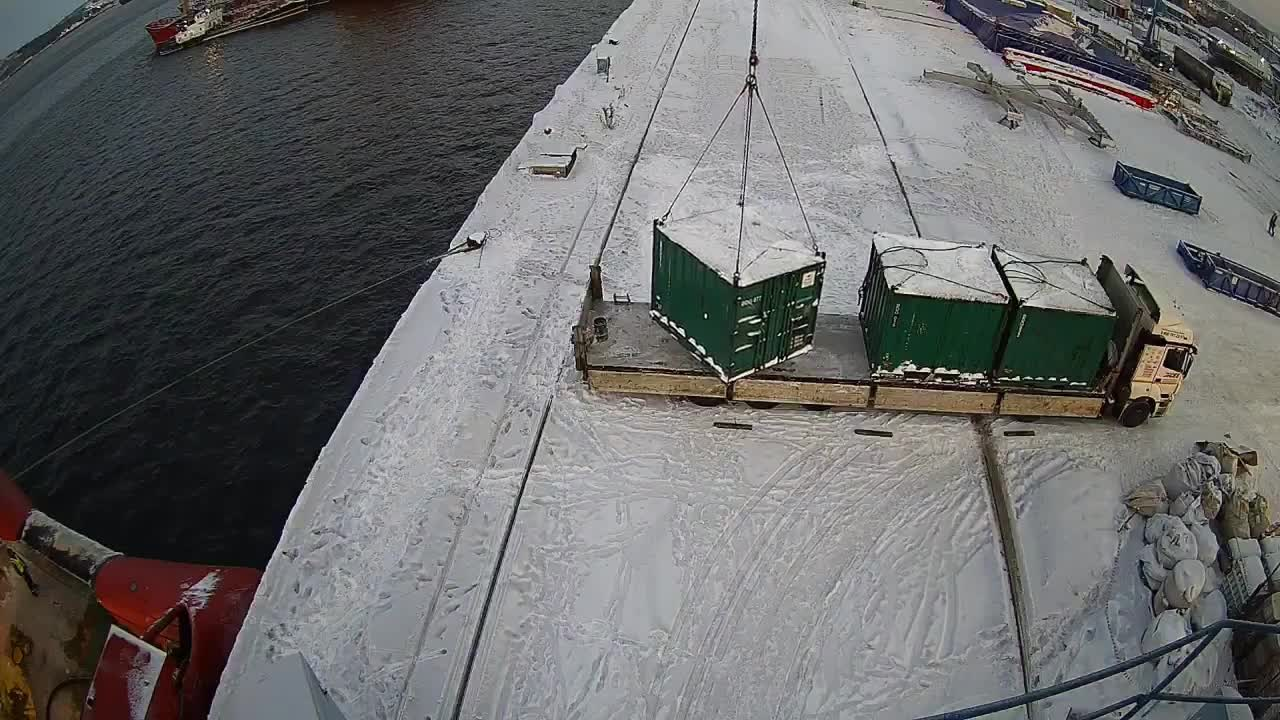

In [13]:
from PIL import Image

r = results[0]
im_array = r.plot()  # plot a BGR numpy array of predictions
im = Image.fromarray(im_array[..., ::-1])  # RGB PIL image
display(im)

In [7]:
results[0].keypoints

ultralytics.engine.results.Keypoints object with attributes:

conf: None
data: tensor([], size=(1, 0, 15))
has_visible: False
orig_shape: (720, 1280)
shape: torch.Size([1, 0, 15])
xy: tensor([], size=(1, 0, 2))
xyn: tensor([], size=(1, 0, 2))

- Сбор датасета
- Разметка датасета в CVAT.ai
- Экспорт в формат COCO CVAT.ai
- [Конвертация в формат YOLO](https://github.com/Koldim2001/COCO_to_YOLOv8) 
 - pip install -r requirements.txt
 - python coco_to_yolo.py --coco_dataset="dataset_folder" --autosplit=True --percent_val=30 --lang_ru=True

In [8]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [9]:
# from ultralytics.data.converter import convert_coco

# convert_coco(labels_dir='annot\project_gazprom_annotations_2024_04_21_19_48_36_coco keypoints 1.0', use_keypoints=True)

In [10]:
# https://pytorch.org/get-started/locally/
# conda install pytorch torchvision torchaudio pytorch-cuda=12.1 -c pytorch -c nvidia


In [11]:
# python coco_to_yolo.py --coco_dataset="coco_dataset" --autosplit=True --percent_val=30 --lang_ru=True
# не подходит формат